# Problem 5.17

___This problem is only required for 507 and Honors students.  It will be counted as extra credit for all others.___

Use this notebook to present your work on the problem.  If you write scripts, store them in this folder and run them within this notebook to produce the requested histograms and graphs.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt


## (a) Cauchy distribution

2


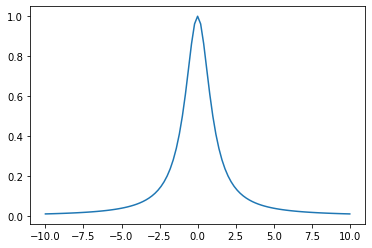

In [34]:
u_x = 0 
eta = 1
A = 1
x = np.linspace(-10,10,101)
p_cauchy = A/(1+((x-u_x)/eta)**2)
plt.plot(x,p_cauchy)

FWHM = 2*eta
print(FWHM)

## (b) Gaussian distribution

-0.5

## (c) $P(|x| > FWHM/2)$ for Cauchy distribution

## (d) $P(|x| > FWHM/2)$ for Gaussian distribution

## (e) $P(|x| > 1.5 \, FWHM)$ for Cauchy and Gaussian distributions

## (f) Interquartile range